 # <u> CIFAR10 classification with a simple Convolutional Network <u>

We train a simple convolutional network on the CIFAR10 dataset, consisting of 60k images of size 32x32 pixels and 3 (RGB) channels. The images are of 10 different classes of objects (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).

NOTE! This network is built using layers written up in the mytorch package. Of particular note, the MaxPool2d and Conv2d layers are implemented using the torch.as_strided function, which implements incredibly slowly as written (to be fixed in the future) 

In [1]:
#Load packages
import torch
import torch.optim as optim
from mytorch.data_utils import get_CIFAR10
import mytorch.models.conv_net as mynet


### <u> Load Data<u>

We load the data to the relevant device using the loader in data_utils. Data is split as Train/Val/Test = (40k,10k,10k). Each split contains a further tuple torch tensors for the images and labels.

In [2]:
#Get data
device = (
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available()
    else "cpu"
)

train_data, val_data, test_data, label_dict = get_CIFAR10(device)
data = (train_data,val_data,test_data)

### <u> Initialize Model <u>

We build a convolutional neural network (as defined in mytorch/models/conv_net), that is built from convolutional, pooling, dropout, and fully connected layers. 

In [3]:
n_channels = [3,8,16,32,64]
n_fc = [256,10]
dropout = 0.3
lr= 1e-3


cfar = mynet.ConvNet(n_channels,n_fc,dropout=dropout, learning_rate=lr, device=device)


### <u> Train Model <u>

We train the model (note that the optimizer -- Adam-- is constructed automatically in the initialization of the network)

  0%|          | 0/10 [00:00<?, ?it/s]

Test Error: 
 Accuracy: 47.6%, Avg loss: 1.445313

Test Error: 
 Accuracy: 54.9%, Avg loss: 1.262781

Test Error: 
 Accuracy: 60.3%, Avg loss: 1.128310

Test Error: 
 Accuracy: 62.4%, Avg loss: 1.063268

Test Error: 
 Accuracy: 64.6%, Avg loss: 0.998333

Test Error: 
 Accuracy: 66.8%, Avg loss: 0.937950

Test Error: 
 Accuracy: 67.9%, Avg loss: 0.903961

Test Error: 
 Accuracy: 68.9%, Avg loss: 0.888879

Test Error: 
 Accuracy: 69.1%, Avg loss: 0.892697

Test Error: 
 Accuracy: 70.3%, Avg loss: 0.864814

Final Test Error
Test Error: 
 Accuracy: 70.2%, Avg loss: 0.868979

0.7019


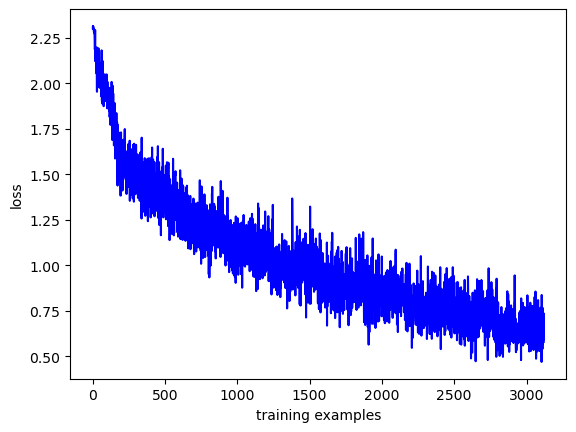

In [4]:

epochs = 10
batch_size = 128

out = cfar.train_model(data, epochs, batch_size, save= "myconvnet_2.pt")

The final test accuracy saturates (barely) at just over 70% accuracy. 